In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df1=pd.read_excel('/content/drive/My Drive/[v4] Datasets & Questions/date.xlsx')

In [ ]:
df2=pd.read_excel('/content/drive/My Drive/[v4] Datasets & Questions/sales_data.xlsx')

In [ ]:
df1.head()

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [ ]:
df1.rename(columns={'timestamp              ':'transaction_timestamp'}, inplace=True)

In [ ]:
df2.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df2.describe()

,quantity sold,unit price,customer id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df2.columns=df2.columns.str.replace(' ','_')

In [ ]:
df2.nunique()

transaction_id           25900
product_id                4070
product_description       4223
quantity_sold              722
transaction_timestamp    23260
unit_price                1630
customer_id               4372
transaction_country         38
dtype: int64

In [ ]:
df2.isna().sum()

transaction_id                0
product_id                    0
product_description        1454
quantity_sold                 0
transaction_timestamp         0
unit_price                    0
customer_id              135080
transaction_country           0
dtype: int64

In [ ]:
df2.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df2['sale_amt']=df2['quantity_sold'].multiply(df2['unit_price'])

In [ ]:
df2.shape

(541909, 9)

## The entries with unit_price=0 are of no use in answering any business question for us

In [ ]:
df2=df2[(df2['unit_price']!=0.0)]

In [ ]:
dfneg=df2[df2['sale_amt']<0]

In [ ]:
dfneg[dfneg['product_description']==('Adjust bad debt')]

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06


In [ ]:
dfneg.nsmallest(20, ['sale_amt'])

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,-16453.71
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,-13541.33
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,-13474.79
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom,-11586.50


### Top 2 transactions like transactions in negative df can really skew the Statistics later on, therefore finding and removing them would be a better idea right now

In [ ]:
dfpos=df2[df2['sale_amt']>0]

In [ ]:
dfpos[dfpos['product_description']==('Adjust bad debt')]

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06


In [ ]:
dfpos.nlargest(20, ['sale_amt'])

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646.0,Netherlands,4992.00


In [ ]:
df2.drop(index=[540421,61619,222680,540422,61624,222681,173382,173277],inplace=True)

In [ ]:
df2=df2[df2['transaction_timestamp']< ('2011-12-01 00:00:00')]

### Dropped these Indexes because they will skew the statistics

In [ ]:
df_cancelled=df2[df2['transaction_id'].str.startswith('C')==True]

In [ ]:
df_cancelled.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


### Dataframe for Cancelled Transactions (which started with c)

In [ ]:
#Cancelled Transaction minus All of the transactions
#df_valid=df2[~df2.isin(df_cancelled)].dropna(how='all')

### PRODUCT ID'S that differ from usual

In [ ]:
df2[df2['product_id'].str.contains('^[A-Z]', regex=True)==True]['product_id'].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'DCGS0070', 'DCGS0069', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'DCGS0004', 'B', 'CRUK'], dtype=object)

In [ ]:
df2.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df2.groupby(['product_id', 'product_description'])['sale_amt'].sum().reset_index().nlargest(10, ['sale_amt'])

,product_id,product_description,sale_amt
4162,DOT,DOTCOM POSTAGE,186372.79
1265,22423,REGENCY CAKESTAND 3 TIER,158859.27
2673,47566,PARTY BUNTING,97384.50
3784,85123A,WHITE HANGING HEART T-LIGHT HOLDER,95671.04
3773,85099B,JUMBO BAG RED RETROSPOT,90160.33
4165,POST,POSTAGE,63505.85
1954,23084,RABBIT NIGHT LIGHT,57138.58
947,22086,PAPER CHAIN KIT 50'S CHRISTMAS,56921.23
2881,84879,ASSORTED COLOUR BIRD ORNAMENT,56796.99
2742,79321,CHILLI LIGHTS,51134.07


In [ ]:
df2.groupby(['product_id', 'product_description'])['sale_amt'].sum().reset_index().nsmallest(10, ['sale_amt'])

,product_id,product_description,sale_amt
4149,AMAZONFEE,AMAZON FEE,-192097.540
4163,M,Manual,-29736.960
4150,B,Adjust bad debt,-11062.060
4151,BANK CHARGES,Bank Charges,-7190.639
4153,CRUK,CRUK Commission,-6832.990
4154,D,Discount,-5667.540
4166,S,SAMPLES,-3049.390
3413,79323W,WHITE CHERRY LIGHTS,-54.000
2932,85063,CREAM SWEETHEART MAGAZINE RACK,-46.850
2595,35400,WOODEN BOX ADVENT CALENDAR,-45.700


In [ ]:
df_discounted=df2[df2['product_id']=='D']

In [ ]:
df_discounted.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,-29.29
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,-281.00
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,-267.12
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,-5.76


In [ ]:
c2=df2[df2['product_id'].str.contains('^C2$', regex=True)==True]

In [ ]:
bad_debt=df2[df2['product_id']=='B']

In [ ]:
bank=df2[df2['product_id'].str.contains('^BANK')==True]

In [ ]:
outside_postage=df2[df2['product_id'].str.contains('^POST$')==True]

In [ ]:
c2.nsmallest(5, 'sale_amt')

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
44302,C540164,C2,CARRIAGE,-1,2011-01-05 12:02:00,50.0,14911.0,EIRE,-50.0
235920,C557663,C2,CARRIAGE,-1,2011-06-21 17:59:00,15.0,NaN,EIRE,-15.0
89294,543899,C2,CARRIAGE,1,2011-02-14 12:11:00,15.0,NaN,EIRE,15.0
228917,556969,C2,CARRIAGE,1,2011-06-16 10:11:00,25.0,16257.0,United Kingdom,25.0
234837,557605,C2,CARRIAGE,1,2011-06-21 12:06:00,25.0,14911.0,EIRE,25.0


In [ ]:
uk_postage=df2[df2['product_id'].str.contains('^DOT$')==True]

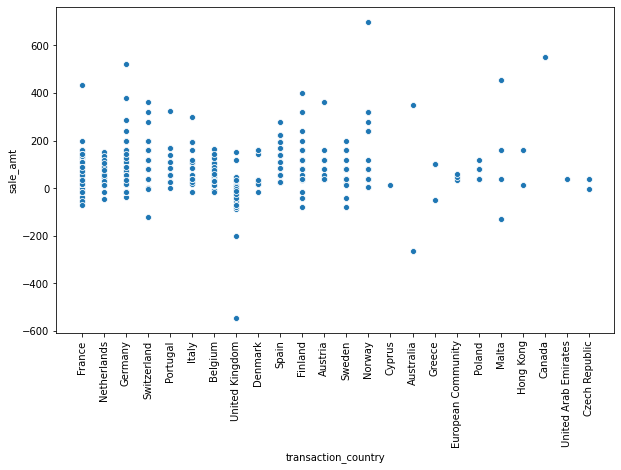

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(outside_postage['transaction_country'], outside_postage['sale_amt'])
plt.xticks(rotation=90);

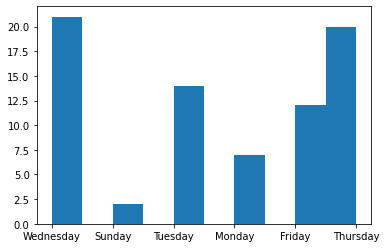

In [ ]:
plt.hist(df_discounted['transaction_timestamp'].dt.day_name());

In [ ]:
print("The quantity sold\n",uk_postage['quantity_sold'].value_counts())

The quantity sold
  1    690
-1      1
Name: quantity_sold, dtype: int64


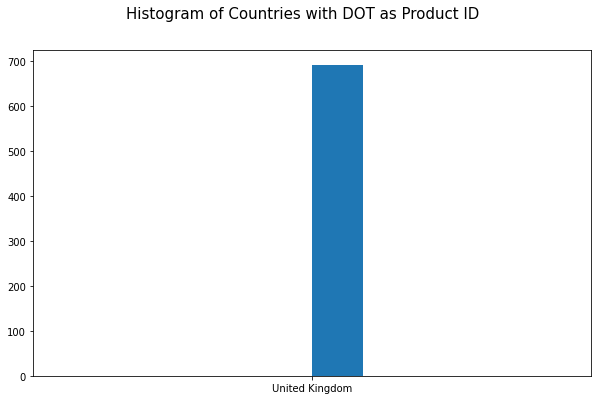

In [ ]:
plt.figure(figsize=[10,6])
plt.hist(uk_postage['transaction_country'])
plt.suptitle("Histogram of Countries with DOT as Product ID", fontsize=15);

In [ ]:
df2[df2['product_id'].str.contains('^PAD')==True]

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001


In [ ]:
manual=df2[df2['product_id']=='M']

In [ ]:
samples=df2[df2['product_id']=='S']

In [ ]:
amazon=df2[df2['product_id'].str.contains('AMAZON')==True]

In [ ]:
amazon['sale_amt'].sum()

-192097.54

In [ ]:
cruk_commission=df2[df2['product_id'].str.contains('CRUK')==True]

In [ ]:
print("Total Amount paid as cruk commission is",-cruk_commission['sale_amt'].sum())

Total Amount paid as cruk commission is 6832.990000000001


### All the CRUK commission comes from the same customer_id, on googling I found out that CRUK us cancer research UK, also this customer_id(14096), might be having a tie up with the company based on the number of sales that come from them, the company has to donate to CRUK

In [ ]:
cruk_commission['sale_amt'].sum()

-6832.990000000001

In [ ]:
df2[df2['customer_id']==14096.0]

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt
317502,564764,16207B,PINK HEART RED HANDBAG,1,2011-08-30 10:49:00,2.46,14096.0,United Kingdom,2.46
317503,564764,16225,RATTLE SNAKE EGGS,1,2011-08-30 10:49:00,3.29,14096.0,United Kingdom,3.29
317504,564764,16254,TRANSPARENT ACRYLIC TAPE DISPENSER,1,2011-08-30 10:49:00,1.63,14096.0,United Kingdom,1.63
317505,564764,84249A,"GREETING CARD,SQUARE, DOUGHNUTS",1,2011-08-30 10:49:00,0.83,14096.0,United Kingdom,0.83
317506,564764,84659A,WHITE TRAVEL ALARM CLOCK,2,2011-08-30 10:49:00,1.23,14096.0,United Kingdom,2.46
...,...,...,...,...,...,...,...,...,...
508557,579196,21756,BATH BUILDING BLOCK WORD,1,2011-11-28 15:54:00,11.63,14096.0,United Kingdom,11.63
508558,579196,21786,POLKADOT RAIN HAT,4,2011-11-28 15:54:00,0.83,14096.0,United Kingdom,3.32
508559,579196,21790,VINTAGE SNAP CARDS,25,2011-11-28 15:54:00,1.63,14096.0,United Kingdom,40.75
508560,579196,21791,VINTAGE HEADS AND TAILS CARD GAME,9,2011-11-28 15:54:00,2.46,14096.0,United Kingdom,22.14


In [ ]:
df2.isna().sum()

transaction_id                0
product_id                    0
product_description           0
quantity_sold                 0
transaction_timestamp         0
unit_price                    0
customer_id              124795
transaction_country           0
sale_amt                      0
dtype: int64

In [ ]:
df_bridge=pd.concat([outside_postage, c2, uk_postage])

In [ ]:
df_valid=df2[~df2.isin(df_bridge)].dropna(how='all')

## Basically all the transactions which have to be passed on directly from customer to vendors are removed and a valid dataframe is created

In [ ]:
df_valid[df_valid['product_id'].str.contains('^[A-Z]', regex=True)==True]['product_id'].unique()

array(['D', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003',
       'DCGS0070', 'DCGS0069', 'DCGSSBOY', 'DCGSSGIRL', 'PADS',
       'DCGS0004', 'B', 'CRUK'], dtype=object)

In [ ]:
df_valid['month']=df_valid['transaction_timestamp'].dt.month
df_valid['hour_of_day']=df_valid['transaction_timestamp'].dt.hour
df_valid['time_of_day']=df_valid['transaction_timestamp'].dt.time
df_valid['day_of_week']=df_valid['transaction_timestamp'].dt.day_name()

In [ ]:
unique_customers=df_valid['customer_id'].nunique()
unique_products=df_valid['product_id'].nunique()
contries_of_sale=df_valid['transaction_country'].nunique()

In [ ]:
print("The store Operate on these days of the week\n",df_valid['day_of_week'].unique())

The store Operate on these days of the week
 ['Wednesday' 'Thursday' 'Friday' 'Sunday' 'Monday' 'Tuesday']


### Looks like Saturdays there is no sale done by the Company, so it is fine to assume this is a retail store and not online

In [ ]:
top_countries_by_no_of_sale=df_valid.groupby(['transaction_country'])['sale_amt'].count().reset_index().rename(columns={'sale_amt':'count'}).nlargest(10,['count']).reset_index(drop=True)

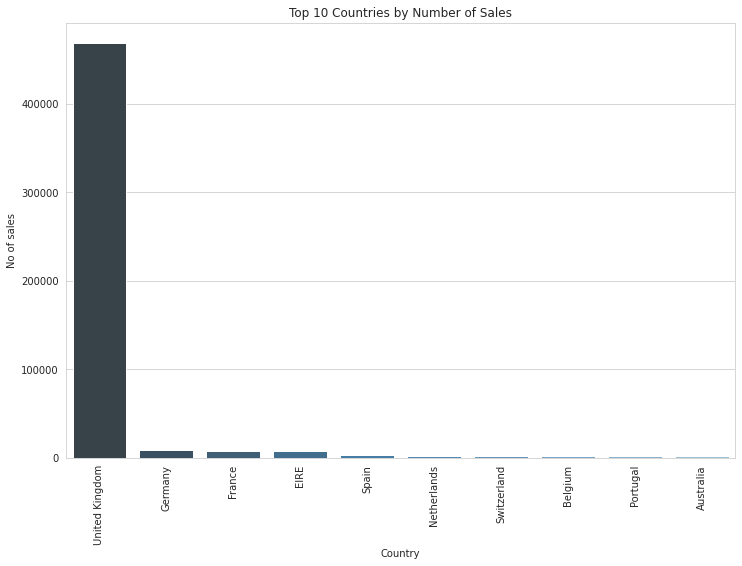

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(top_countries_by_no_of_sale['transaction_country'],top_countries_by_no_of_sale['count'], palette="Blues_d")
plt.title('Top 10 Countries by Number of Sales')
plt.xlabel("Country")
plt.ylabel("No of sales")
plt.xticks(rotation=90);

### It is probable from the visualisations above that this is a store in based out in UK, with branches in many other countries

In [ ]:
top_txn=df_valid.groupby(['transaction_id','transaction_country'])['quantity_sold'].sum().reset_index().nlargest(20, ['quantity_sold'])

In [ ]:
top_prod=df_valid.groupby(['product_id', 'product_description'])['sale_amt'].sum().reset_index().nlargest(10, ['sale_amt'])

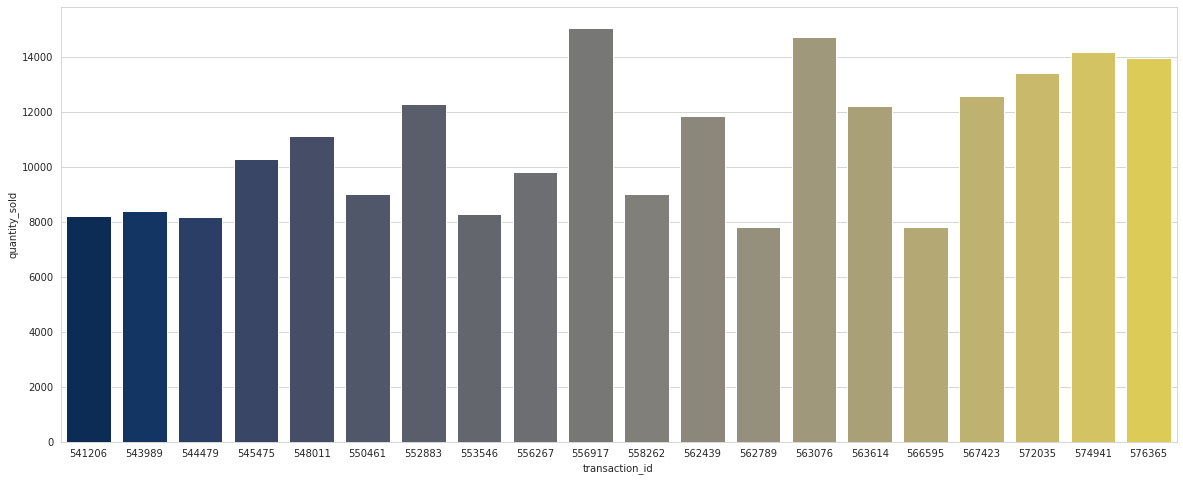

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x = top_txn['transaction_id'], y = top_txn['quantity_sold'], palette='cividis')

In [ ]:
df_valid[df_valid['transaction_id'].isin(top_txn['transaction_id'])].groupby('transaction_id')['quantity_sold'].sum().reset_index().rename(columns={'quantity_sold':'no_of_product_bought'})

,transaction_id,no_of_product_bought
0,541206,8210.0
1,543989,8384.0
2,544479,8174.0
3,545475,10272.0
4,548011,11116.0
5,550461,9014.0
6,552883,12266.0
7,553546,8268.0
8,556267,9811.0
9,556917,15049.0


### The number of items bought by the customer in a single transaction is really large, we can say that the customers of this business are wholesalers

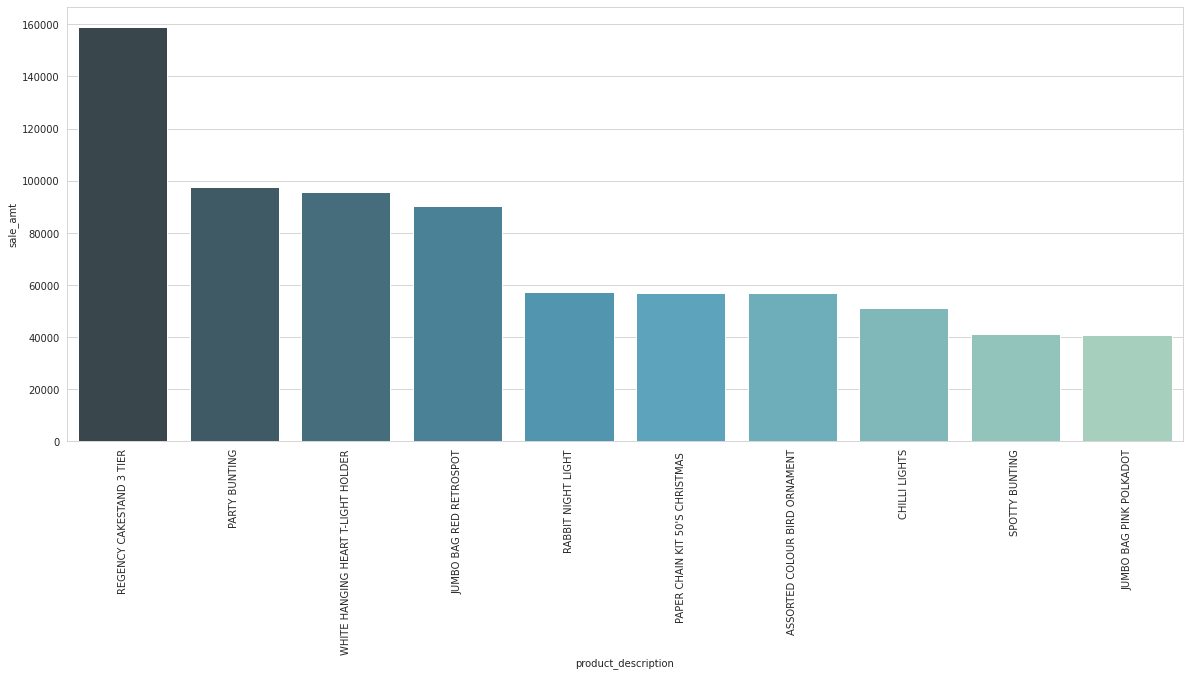

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x = top_prod['product_description'], y = top_prod['sale_amt'], palette='GnBu_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### Regency CakeStand 3 Tier, comes the Top product Undoubtedly

In [ ]:
df_pos=df_valid[df_valid['sale_amt']>0]
df_neg=df_valid[df_valid['sale_amt']<0]

In [ ]:
by_hour_sale_analysis=df_pos.groupby('hour_of_day').sum().drop(columns=['month','customer_id'])

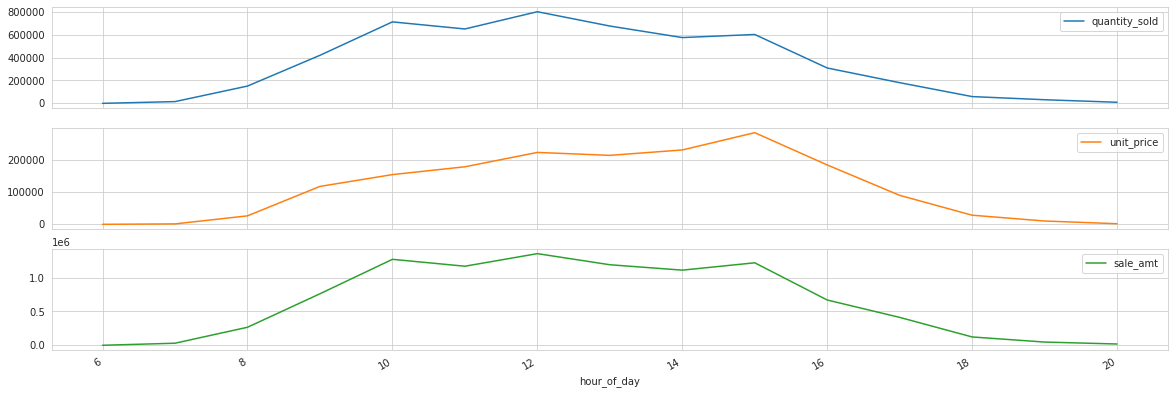

In [ ]:
by_hour_sale_analysis.plot(subplots=True, figsize=(20,7));

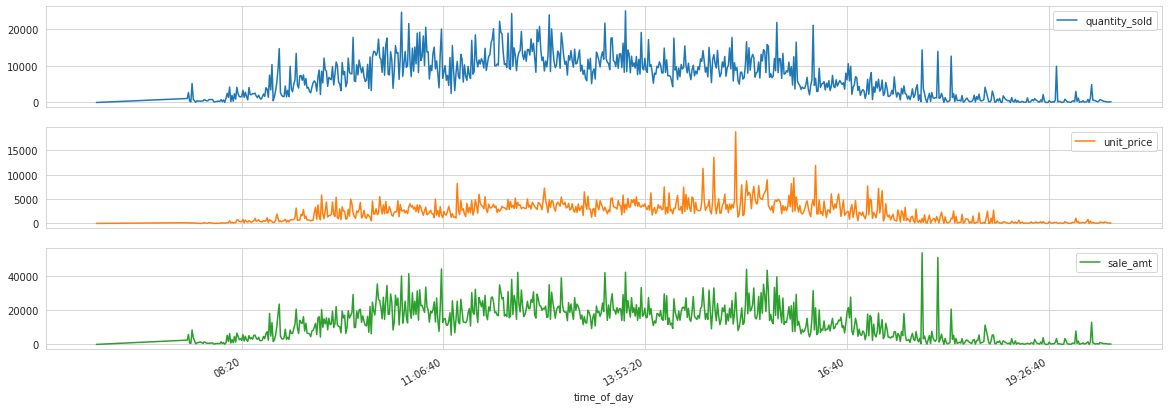

In [ ]:
by_time_sale_analysis=df_pos.groupby('time_of_day').sum().drop(columns=['month','customer_id','hour_of_day'])
by_time_sale_analysis.plot(subplots=True, figsize=(20,7));

### Based on this we can conclude the stores are open from 6:00 AM to 8:00 PM and the maximum number of sales and highest sale amount come between 10:00 AM and 3:00 PM, and the most expensive items are sold at around 3:00 PM 
#### (this is only the sale transaction per day. not cancelled or returned or any kind of expenditure, since it doesn't make sense to be included in hourly analysis)

In [ ]:
by_month_analysis=df_valid.groupby('month').sum().drop(columns=['unit_price','hour_of_day','customer_id'])

In [ ]:
by_month_analysis_mean=df_valid.groupby('month')['unit_price'].median()

In [ ]:
by_month_analysis.loc[0]=by_month_analysis.loc[12]
by_month_analysis.drop(index=12, inplace=True)
by_month_analysis.sort_index(inplace=True)
by_month_analysis.rename(index={0:'Dec 2010'}, inplace=True)
by_month_analysis_mean.loc[0]=by_month_analysis_mean.loc[12]
by_month_analysis_mean.drop(index=12, inplace=True)
by_month_analysis_mean.sort_index(inplace=True)
by_month_analysis_mean.rename(index={0:'Dec 2010'}, inplace=True)

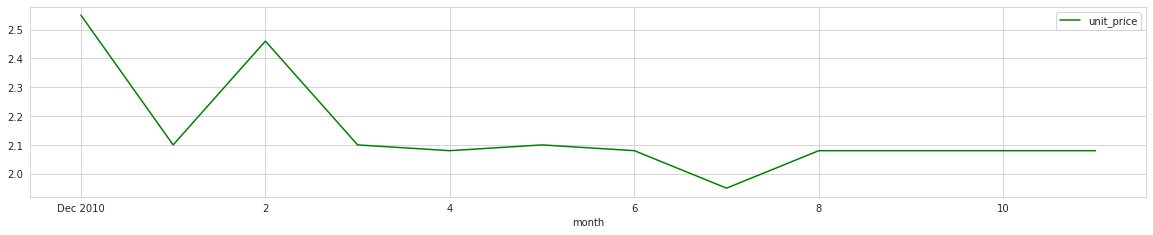

In [ ]:
by_month_analysis_mean.plot(figsize=(20,3.5), c='g')
plt.legend();

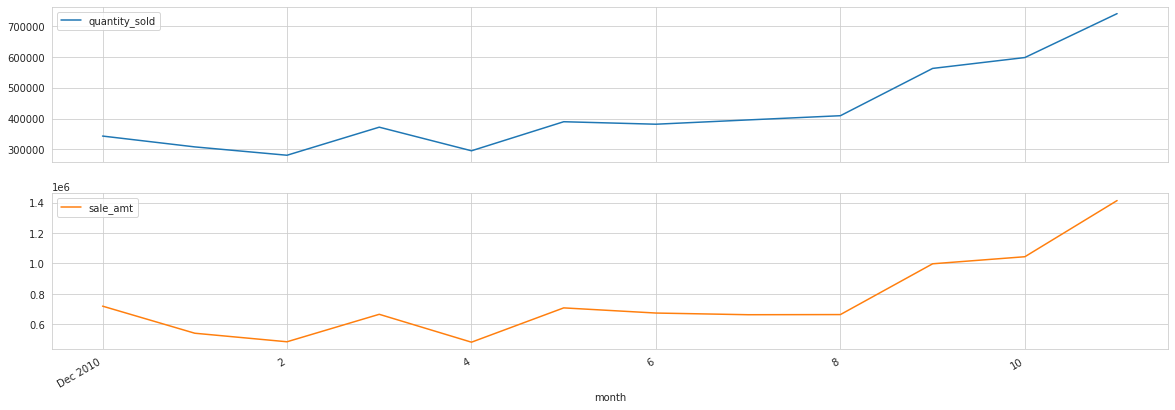

In [ ]:
by_month_analysis.plot(subplots=True, figsize=(20,7));

In [ ]:
by_day_sale_analysis=df_pos.groupby('day_of_week').sum().drop(columns=['hour_of_day','customer_id','month','unit_price'])
by_day_expense_analysis=df_neg.groupby('day_of_week').sum().abs().drop(columns=['hour_of_day','customer_id','month','unit_price']).rename(columns={'sale_amt':'return_amount','quantity_sold':'quantity_returned'})

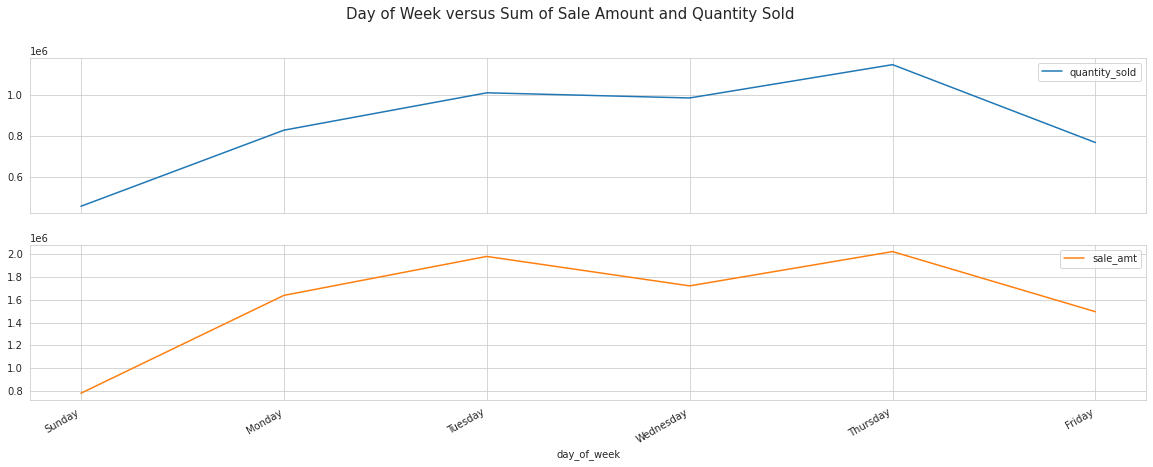

In [ ]:
day_order = [ "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
by_day_sale_analysis.loc[day_order].plot(subplots=True, figsize=(20,7))
plt.suptitle("Day of Week versus Sum of Sale Amount and Quantity Sold", fontsize=15);

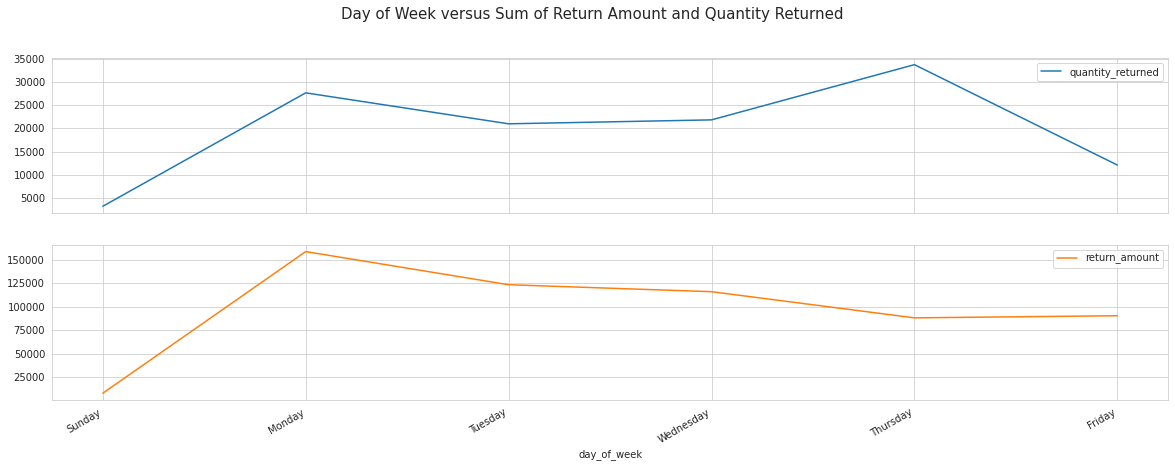

In [ ]:
day_order = [ "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
by_day_expense_analysis.loc[day_order].plot(subplots=True, figsize=(20,7))
plt.suptitle("Day of Week versus Sum of Return Amount and Quantity Returned", fontsize=15);

In [ ]:
df_valid['day_of_year']=df_valid['transaction_timestamp'].dt.dayofyear

In [ ]:
doy_analysis=df_valid.groupby('day_of_year').sum().reset_index().set_index('day_of_year').drop(columns=['hour_of_day','customer_id','month'])

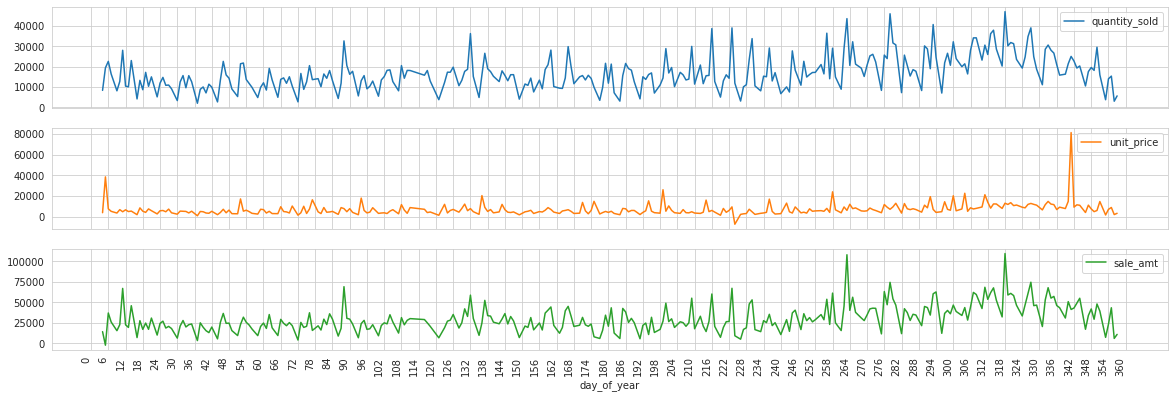

In [ ]:
doy_analysis.plot(subplots=True, figsize=(20,7))
plt.xticks([i for i in range(0,366, 6)], rotation=90);

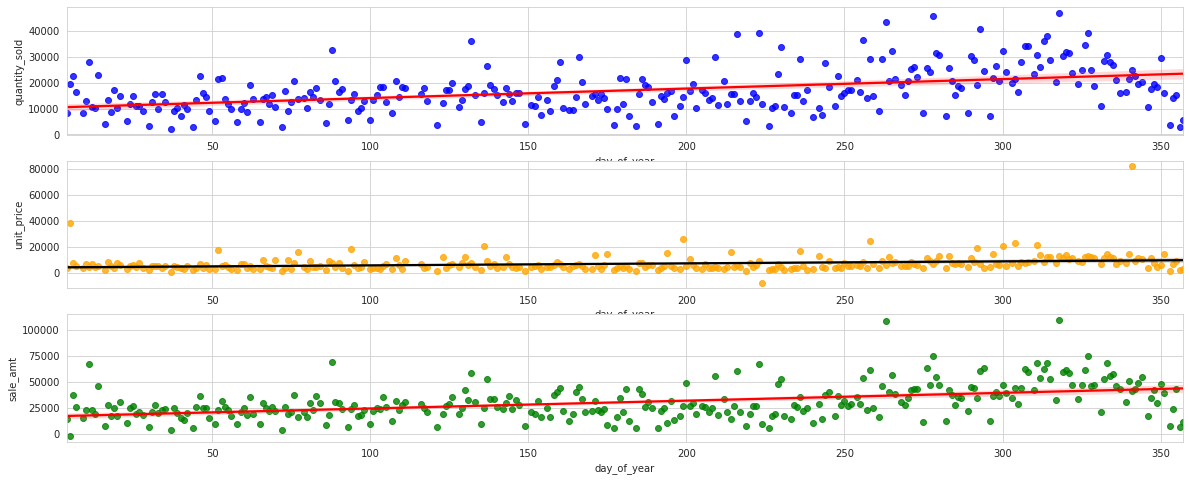

In [ ]:
plt.figure(figsize=[20,8])
plt.subplot(3,1,1)
sns.regplot(x=doy_analysis.index, y=doy_analysis['quantity_sold'],color='blue', line_kws={'color':'red'})
plt.subplot(3,1,2)
sns.regplot(x=doy_analysis.index, y=doy_analysis['unit_price'], color='orange', line_kws={'color':'black'})
plt.subplot(3,1,3)
sns.regplot(x=doy_analysis.index, y=doy_analysis['sale_amt'], color='green', line_kws={'color':'red'});


### Yes the performance of the Store has increased over time, The day of year starts with last year, but after looking at their values, it portrays that they won't skew our predictions, therefore they are considered as usual

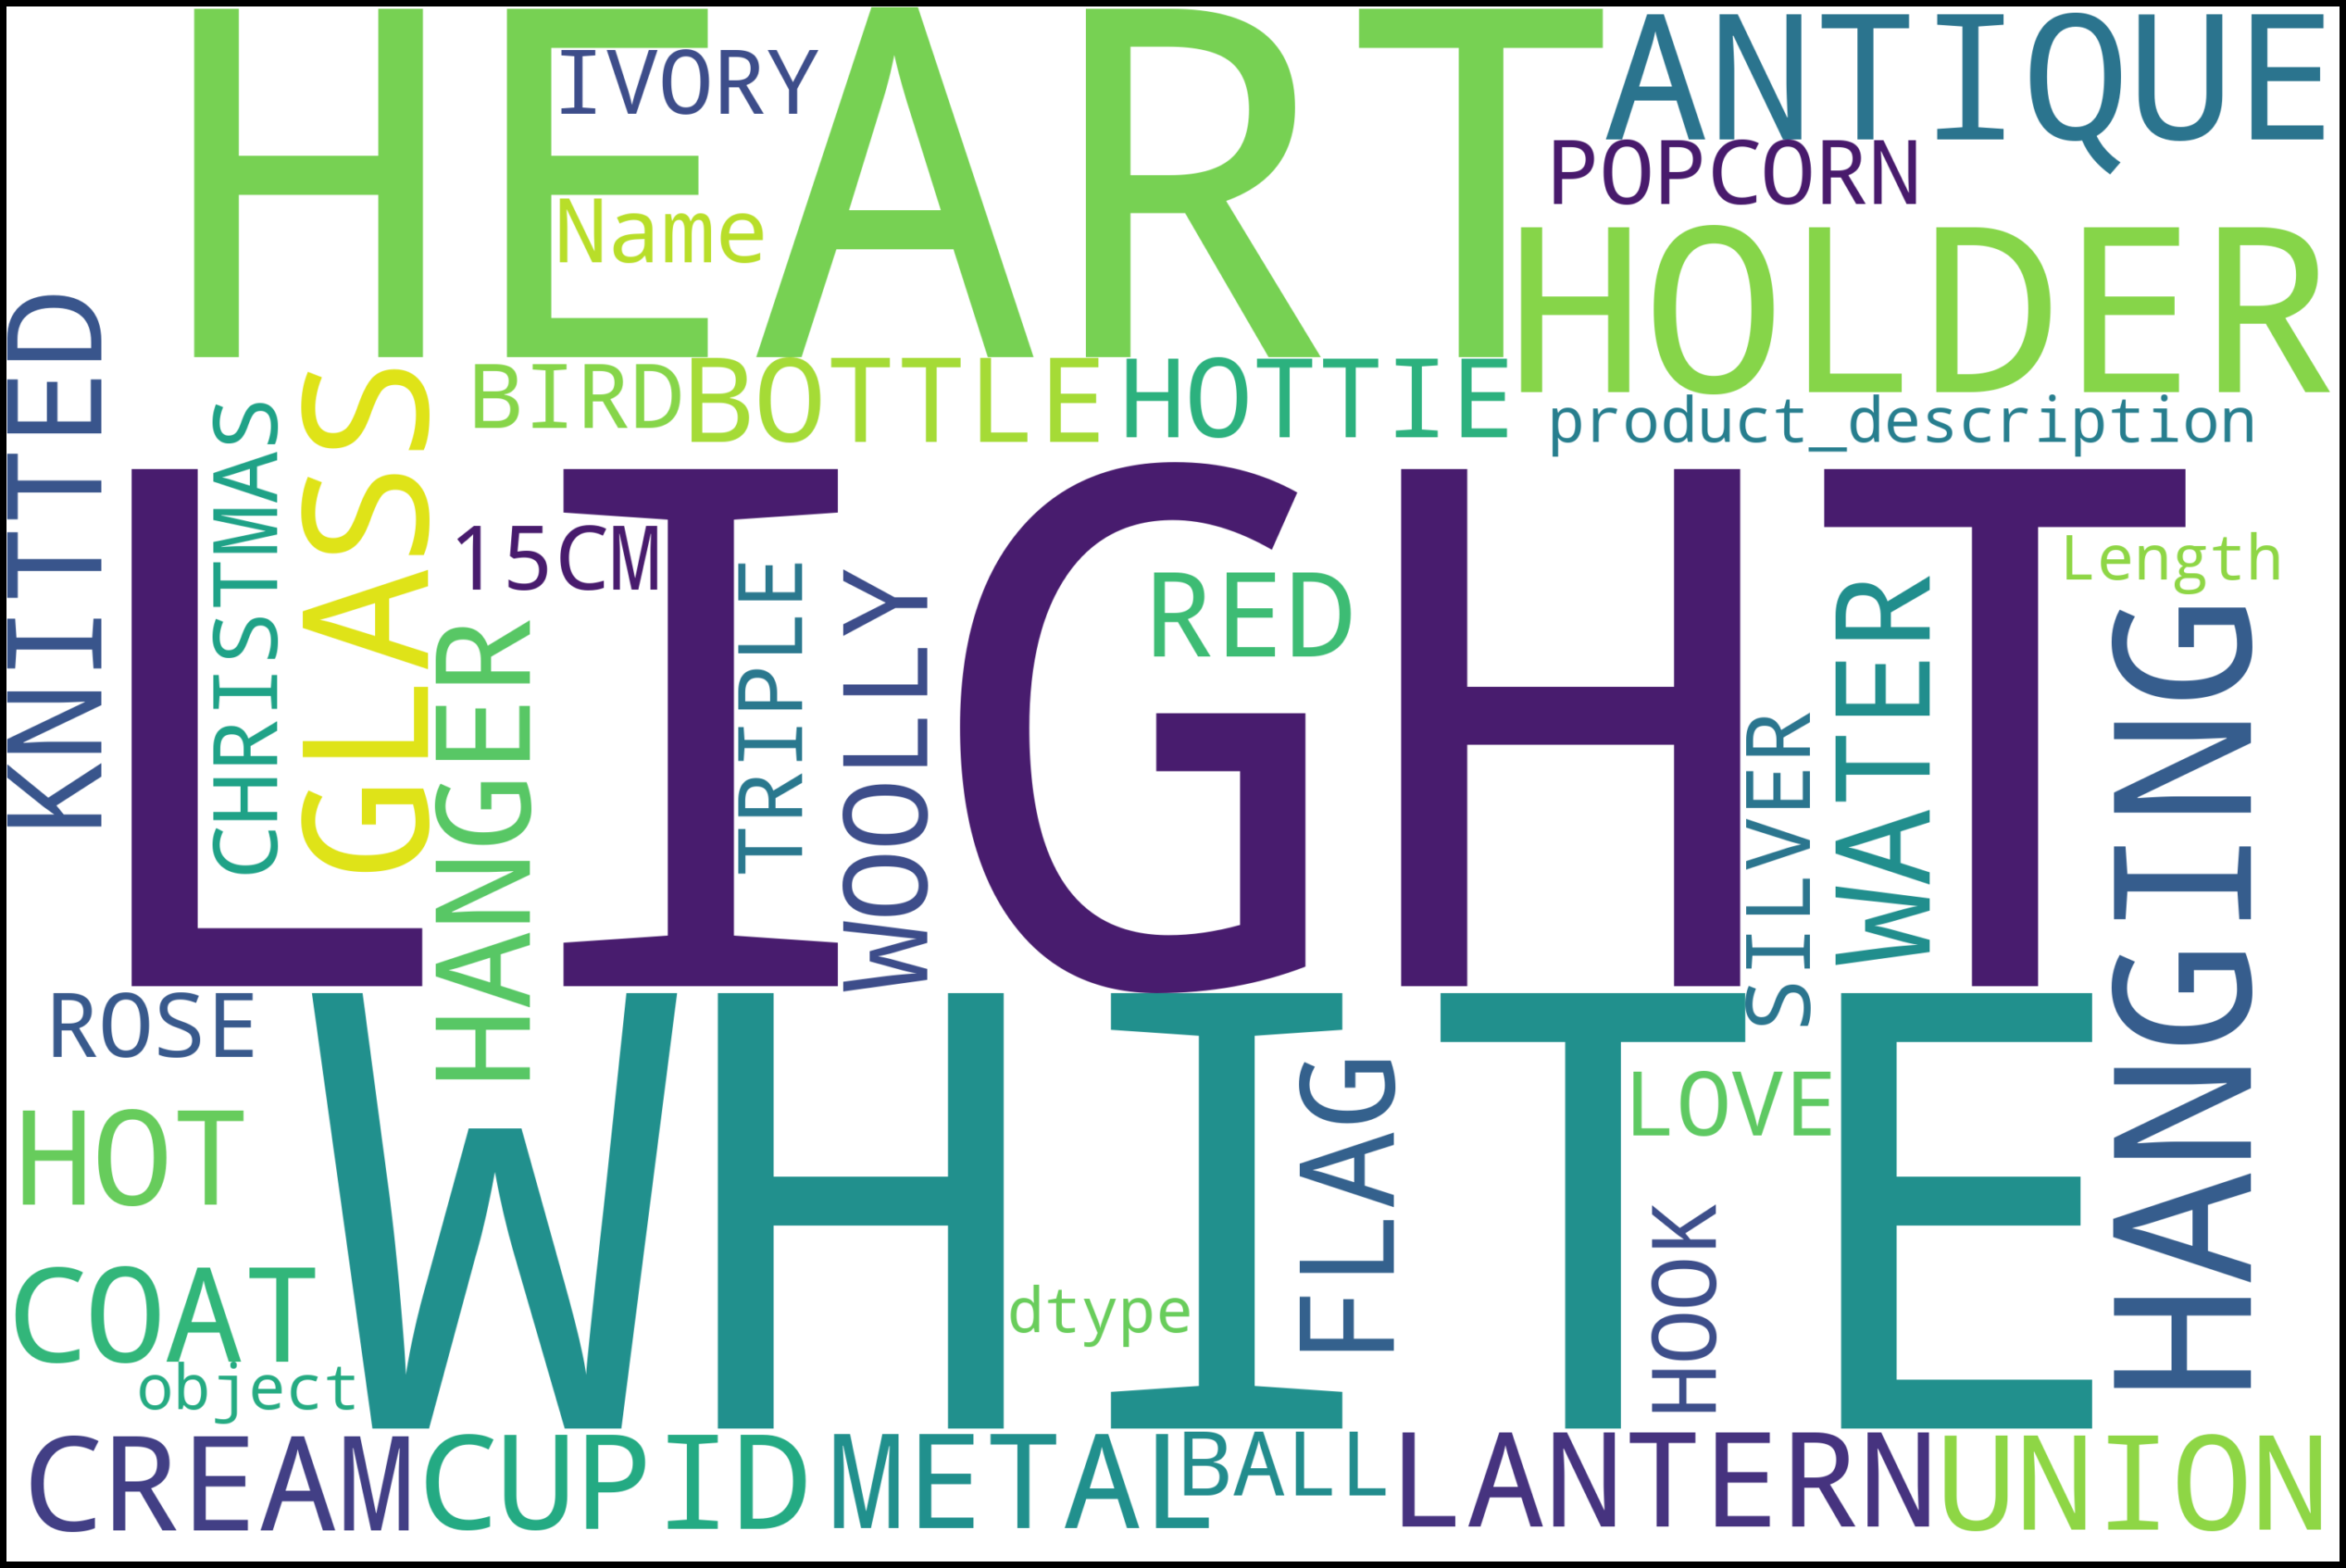

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df2['product_description']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (35, 28),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

### Words like Heart, light, hanger, frame, bottle, cupid, rotating, holder, etc. signifies that this might be a gift store

In [ ]:
df_valid.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt,month,hour_of_day,time_of_day,day_of_week,day_of_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,8,08:26:00,Wednesday,335
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,08:26:00,Wednesday,335
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,8,08:26:00,Wednesday,335
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,08:26:00,Wednesday,335
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,08:26:00,Wednesday,335


In [ ]:
df_valid[df_valid['quantity_sold']<0].groupby('product_description')['quantity_sold'].sum().drop(['Manual'], axis=0)

product_description
 50'S CHRISTMAS GIFT BAG LARGE      -2.0
 DOLLY GIRL BEAKER                  -7.0
 OVAL WALL MIRROR DIAMANTE          -5.0
 SET 2 TEA TOWELS I LOVE LONDON     -8.0
 SPACEBOY BABY GIFT SET             -6.0
                                    ... 
ZINC SWEETHEART WIRE LETTER RACK    -4.0
ZINC T-LIGHT HOLDER STAR LARGE     -11.0
ZINC T-LIGHT HOLDER STARS SMALL    -33.0
ZINC TOP  2 DOOR WOODEN SHELF       -5.0
ZINC WILLIE WINKIE  CANDLE STICK   -12.0
Name: quantity_sold, Length: 1929, dtype: float64

In [ ]:
df_valid[df_valid['product_id']==84347].nlargest(10, 'quantity_sold')

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt,month,hour_of_day,time_of_day,day_of_week,day_of_year
413848,572325,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,600.0,2011-10-24 09:54:00,1.74,14607.0,United Kingdom,1044.00,10,9,09:54:00,Monday,297
488440,577822,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,600.0,2011-11-22 09:34:00,1.74,14607.0,United Kingdom,1044.00,11,9,09:34:00,Tuesday,326
31595,538998,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,480.0,2010-12-15 12:08:00,1.88,15061.0,United Kingdom,902.40,12,12,12:08:00,Wednesday,349
4479,536784,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,240.0,2010-12-02 15:20:00,1.88,15061.0,United Kingdom,451.20,12,15,15:20:00,Thursday,336
23254,538191,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,240.0,2010-12-10 10:49:00,1.88,15061.0,United Kingdom,451.20,12,10,10:49:00,Friday,344
447050,574941,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,236.0,2011-11-07 17:42:00,5.95,NaN,United Kingdom,1404.20,11,17,17:42:00,Monday,311
41035,539750,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,138.0,2010-12-21 15:40:00,5.91,NaN,United Kingdom,815.58,12,15,15:40:00,Tuesday,355
467817,576365,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,135.0,2011-11-14 17:55:00,5.95,NaN,United Kingdom,803.25,11,17,17:55:00,Monday,318
4464,536783,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,120.0,2010-12-02 15:19:00,1.88,15061.0,United Kingdom,225.60,12,15,15:19:00,Thursday,336
7747,537053,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,120.0,2010-12-05 11:38:00,2.10,16168.0,United Kingdom,252.00,12,11,11:38:00,Sunday,339


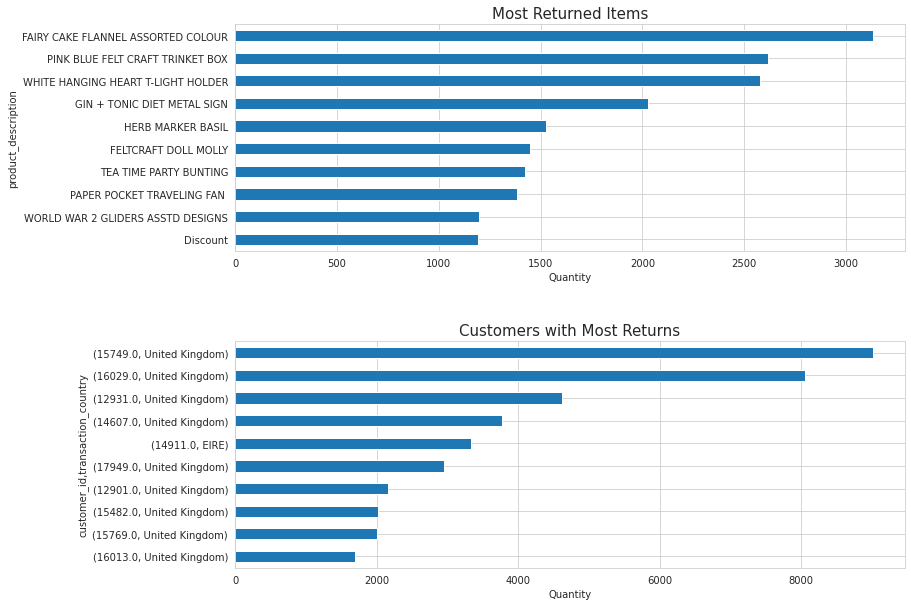

In [ ]:

ReturnedItems = df_valid[df_valid['quantity_sold']<0].groupby('product_description')['quantity_sold'].sum().drop(['Manual','ROTATING SILVER ANGELS T-LIGHT HLDR'], axis=0)
ReturnedItems = ReturnedItems.abs().sort_values(ascending=False)[0:10]
ReturnCust = df_valid[df_valid['quantity_sold']<0].groupby(['customer_id','transaction_country'])['quantity_sold'].sum().drop([15838], axis=0)
ReturnCust = ReturnCust.abs().sort_values(ascending=False)[0:10]

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
ReturnedItems.sort_values().plot(kind='barh', ax=ax1).set_title('Most Returned Items', fontsize=15)
ReturnCust.sort_values().plot(kind='barh', ax=ax2).set_title('Customers with Most Returns', fontsize=15)
ax1.set(xlabel='Quantity')
ax2.set(xlabel='Quantity')
plt.subplots_adjust(hspace=0.4)
plt.show()

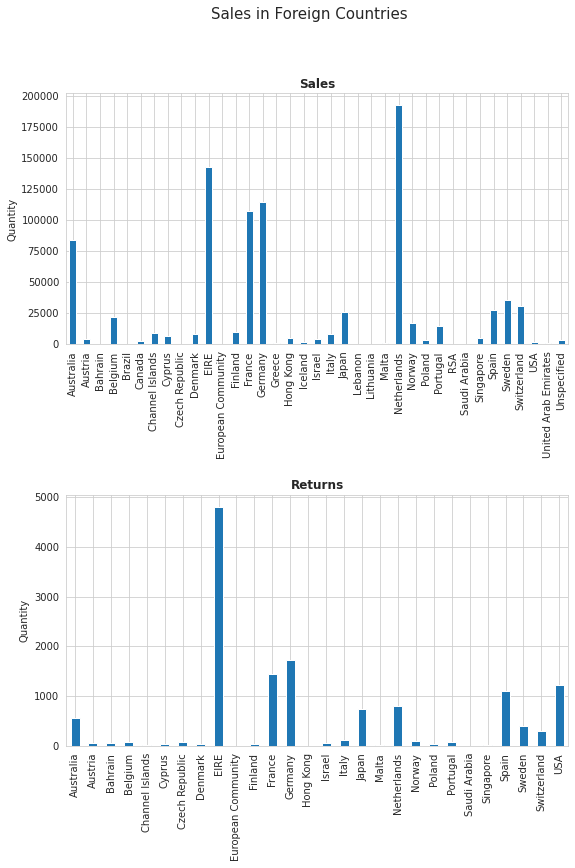

In [ ]:
ByCountrySale = df_valid[(df_valid['transaction_country'] != 'United Kingdom') & (df_valid['quantity_sold'] > 0)].groupby('transaction_country')['quantity_sold'].sum()
ByCountryRet = df_valid[(df_valid['transaction_country'] != 'United Kingdom') & (df_valid['quantity_sold'] < 0)].groupby('transaction_country')['quantity_sold'].sum().abs()

fig, [ax1,ax2] = plt.subplots(nrows=2,ncols=1,figsize=(9,12))
ByCountrySale.plot(kind='bar', ax=ax1).set(ylabel = 'Quantity',xlabel='')
ax1.set_title('Sales', size=12, fontweight = 'bold')
ByCountryRet.plot(kind='bar', ax=ax2).set(ylabel = 'Quantity',xlabel='')
ax2.set_title('Returns', size=12, fontweight = 'bold')
plt.suptitle('Sales in Foreign Countries', fontsize = 15)
plt.subplots_adjust(hspace = 0.6)
plt.show()

### Based on this we can see, netherlands is the most favourable country for our sales and ireland has most return but the sales is good as well. Looks like we need to push more on customer retention strategies in Ireland

* #### Customer Loyality can be measured by the intervals at which each customer is buying, if some customer purchases from us and never purchase back, that means the customer is not a loyal customer.
* #### Customer Acquisition can be measured by the amount of new customers buying each month

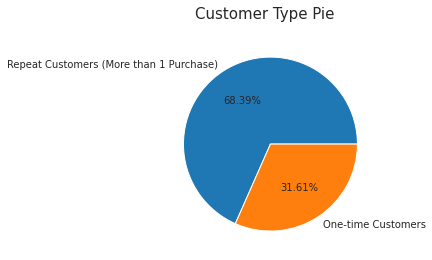

In [ ]:
MostRepeat = df_valid.groupby(['customer_id','transaction_country'])['transaction_id'].nunique().sort_values(ascending=False)
rep = MostRepeat[MostRepeat != 1].values
nrep = MostRepeat[MostRepeat == 1].values
ser = pd.Series([len(rep)/(len(rep)+len(nrep)),len(nrep)/(len(rep)+len(nrep))], index=['Repeat Customers (More than 1 Purchase)','One-time Customers'])

ser.plot(kind='pie', autopct='%.2f%%').set(ylabel='')
plt.suptitle('Customer Type Pie', fontsize=15)
plt.show()

In [ ]:
unique_df=df_valid.dropna(how='any').groupby('month')['customer_id'].unique().reset_index().set_index('month')
unique_df.loc[0]=unique_df.loc[12]
unique_df.drop(index=12, inplace=True)
unique_df.sort_index(inplace=True)
unique_df.rename(index={0:'Dec_2010'}, inplace=True)

In [ ]:
month_name=list(unique_df.index)

In [ ]:
for j in range(11,-1,-1):
  set3=set(unique_df.iloc[j].tolist()[0])
  for k in range(j-1,-1,-1):
      set2=set(unique_df.iloc[k].tolist()[0])
      set3=set3-set2
  print(len(set3))

320
352
298
167
191
235
279
299
440
380
420
948


In [ ]:
new=dict()
for i in range(len(month_name)-1,-1,-1):
  set3=set(unique_df.iloc[i].tolist()[0])
  for j in range(i-1,-1,-1):
        set2=set(unique_df.loc[month_name[j]].tolist()[0])
        set3=set3-set2
  new[month_name[i]]=set3

In [ ]:
unique_cust_df=pd.DataFrame(new.items(), columns=['month', 'unique_customers'])

In [ ]:
unique_cust_df.set_index('month', inplace=True)

In [ ]:
for i in range(len(unique_cust_df['unique_customers'])):
  unique_cust_df['unique_customers'].iloc[i]=len(list(unique_cust_df['unique_customers'].iloc[i]))
unique_cust_df=unique_cust_df.iloc[::-1]

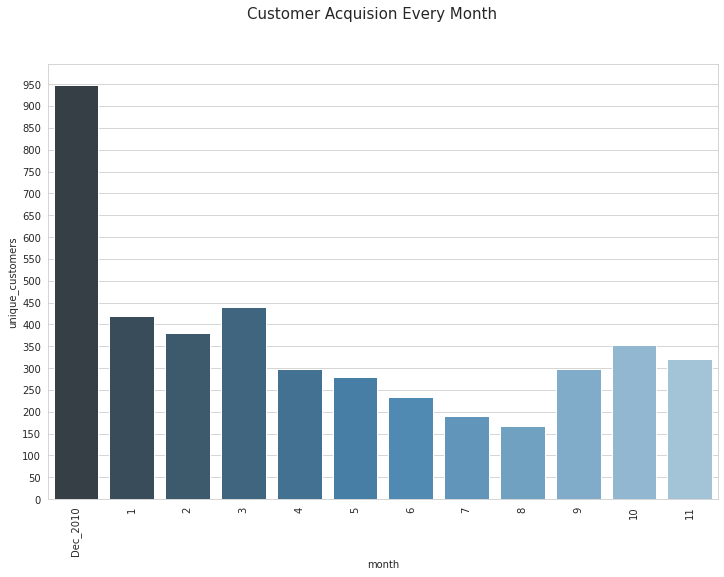

In [ ]:
plt.figure(figsize=[12,8])
sns.barplot(unique_cust_df.index, unique_cust_df['unique_customers'], palette="Blues_d")
plt.xticks(rotation=90)
plt.yticks([i for i in range(0,1000,50)])
plt.suptitle("Customer Acquision Every Month", fontsize=15);

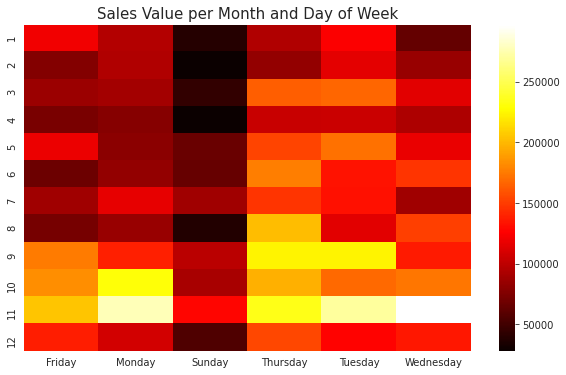

In [ ]:
HM_Data = df_valid.pivot_table(index = 'month',columns = 'day_of_week', values = 'sale_amt', aggfunc='sum')
plt.figure(figsize = (10,6))
sns.heatmap(HM_Data, cmap = 'hot').set(xlabel='', ylabel='')
plt.title('Sales Value per Month and Day of Week', fontsize = 15)
plt.show()

### Major Sale Drivers

In [ ]:
df_valid['product_id'].nunique()

3932

In [ ]:
df_top_products=df_valid.groupby(['product_id','product_description'])['sale_amt'].sum().reset_index().sort_values(by=['sale_amt'], ascending=False)

In [ ]:
df_top_products.set_index('product_id', inplace=True)
total_sale=df_valid['sale_amt'].sum()
top_20_products_percentage=((df_top_products['sale_amt']/total_sale)*100).reset_index().iloc[:786,1].sum()

<Figure size 1080x648 with 0 Axes>

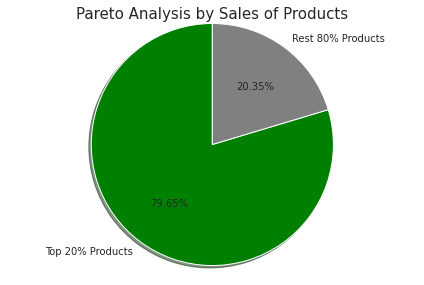

In [ ]:
plt.figure(figsize=[15,9])
labels = ['Top 20% Products', 'Rest 80% Products']
sizes = [top_20_products_percentage, 100-top_20_products_percentage]
colors = ['green', 'grey']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%.2f%%', shadow=True, colors=colors, startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.suptitle("Pareto Analysis by Sales of Products", fontsize=15)
plt.show();

### Above are the net sales based on the product id, therefore they are the sale drivers for the company

In [ ]:
df_top_customers=df_valid.groupby(['customer_id'])['sale_amt'].sum().reset_index().sort_values(by=['sale_amt'], ascending=False)

In [ ]:
df_top_customers.set_index('customer_id', inplace=True)

In [ ]:
total_sale=df_valid['sale_amt'].sum()

In [ ]:
top_20_customer_percentage=((df_top_customers['sale_amt']/total_sale)*100).reset_index().iloc[:878,1].sum()

<Figure size 1080x648 with 0 Axes>

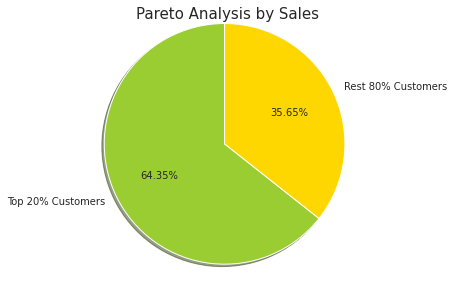

In [ ]:
plt.figure(figsize=[15,9])
labels = ['Top 20% Customers', 'Rest 80% Customers']
sizes = [top_20_customer_percentage, 100-top_20_customer_percentage]
colors = ['yellowgreen', 'gold']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%.2f%%', shadow=True, colors=colors, startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.suptitle("Pareto Analysis by Sales", fontsize=15)
plt.show();

### Top 20 Customers account for 20% of the sale of the business

In [ ]:
sbm=(df_valid.groupby(['month'])['sale_amt'].sum().reset_index().sort_values(by=['month'])['sale_amt']/total_sale)

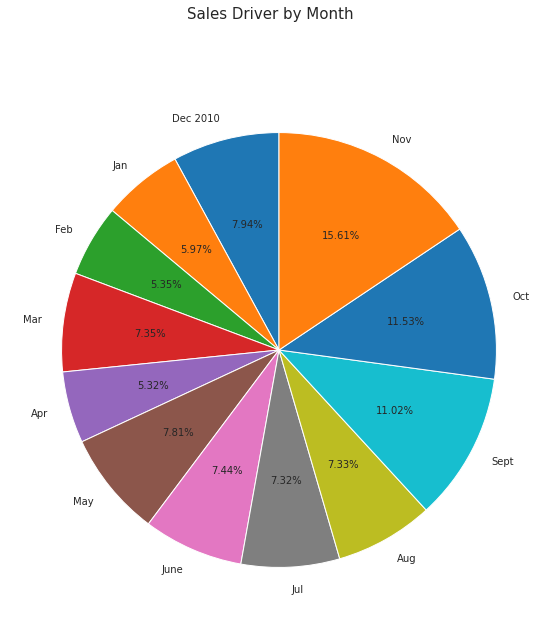

In [ ]:
labels = ['Dec 2010','Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov']
sizes = [sbm[11], sbm[0],sbm[1],sbm[2],sbm[3],sbm[4],sbm[5],sbm[6],sbm[7],sbm[8],sbm[9],sbm[10]]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%.2f%%', startangle=90)
plt.suptitle("Sales Driver by Month", fontsize=15);

### September, October and November Looks are the biggest sales driver as months and the company should focus on these months 

In [ ]:
data_grouped = df_pos.groupby('customer_id')
data_cluster=pd.DataFrame(columns=['quantity_sold','unit_price', 'sale_amt', 'customer_id'])
count=0
for k,v in (data_grouped):
    data_cluster.loc[count] = [(v['quantity_sold'].sum()), v['unit_price'].sum(), v['sale_amt'].sum(), k]
    count+=1

X = data_cluster.iloc[:, [0, 2]].values

In [ ]:
data_cluster.nlargest(20, 'sale_amt')

,quantity_sold,unit_price,sale_amt,customer_id
1670,188886.0,4731.70,267410.00,14646.0
4160,61426.0,1831.96,248171.76,18102.0
3691,69273.0,1133.02,192988.39,17450.0
1859,76238.0,21046.26,132821.14,14911.0
53,77373.0,1747.08,124564.53,12415.0
1318,57872.0,4707.68,116729.63,14156.0
3734,57334.0,2095.60,83683.06,17511.0
2672,40207.0,579.64,72882.09,16029.0
983,60872.0,854.69,61908.46,13694.0
3142,45523.0,621.33,61251.58,16684.0


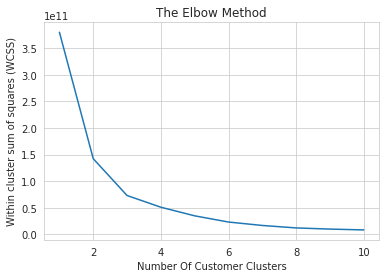

In [ ]:
from sklearn.cluster import KMeans
wcss = [] 

for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters')
plt.ylabel('Within cluster sum of squares (WCSS)')
plt.show()

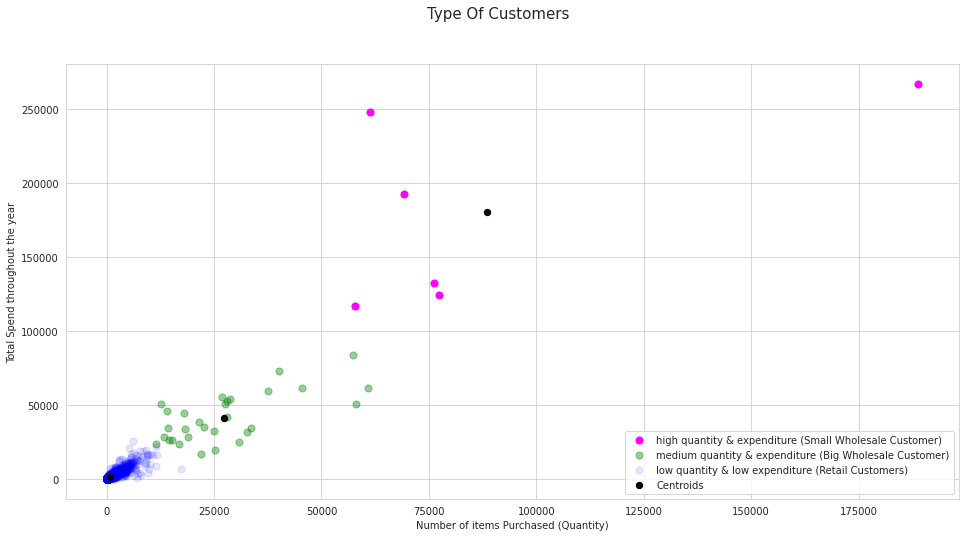

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=[16,8])

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'magenta', label = 'high quantity & expenditure (Small Wholesale Customer)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'medium quantity & expenditure (Big Wholesale Customer)', alpha=0.4)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'low quantity & low expenditure (Retail Customers)', alpha=0.1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'black', label = 'Centroids')
plt.suptitle('Type Of Customers',fontsize=15)
plt.xlabel('Number of items Purchased (Quantity)')
plt.ylabel('Total Spend throughout the year')
plt.legend()
plt.show()

### Preventing Out of Stock situations

In [ ]:
top_prods_10=df_valid.groupby(['product_id','product_description'])['quantity_sold'].sum().reset_index().nlargest(10,'quantity_sold')

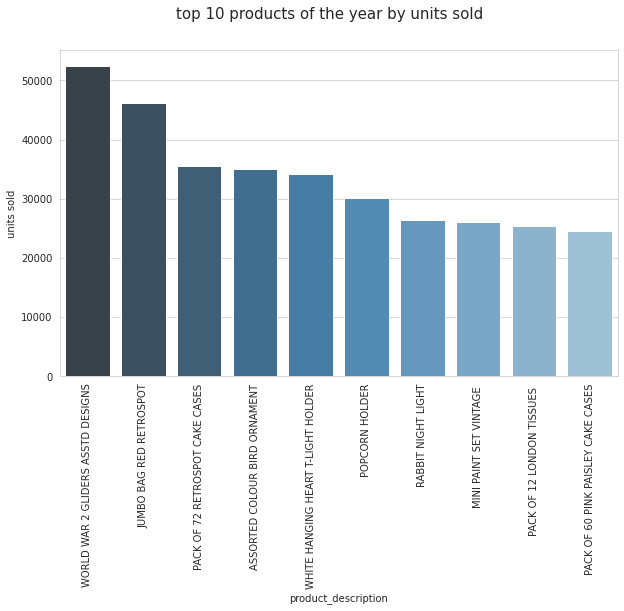

In [ ]:
plt.figure(figsize=[10,6])
sns.barplot(top_prods_10['product_description'], top_prods_10['quantity_sold'],palette="Blues_d")
plt.xticks(rotation=90)
plt.ylabel("units sold")
plt.suptitle("top 10 products of the year by units sold", fontsize=15);

In [ ]:
most_sold_prods=df_valid.groupby(['product_id','product_description','month'])['quantity_sold'].sum().reset_index()

### Net Units i.e. sold and returned and the ones at the top in list looks in most demand hence we need to maintain the stock of them in the particular months

In [ ]:
most_sold_prods[most_sold_prods['month']==12].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
23006,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,12,5195.0
3410,21212,PACK OF 72 RETROSPOT CAKE CASES,12,4076.0
16716,22834,HAND WARMER BABUSHKA DESIGN,12,3382.0
29776,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,3224.0
10167,22197,SMALL POPCORN HOLDER,12,2731.0
13099,22492,MINI PAINT SET VINTAGE,12,2710.0
14360,22616,PACK OF 12 LONDON TISSUES,12,2694.0
15208,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,12,2617.0
9058,22086,PAPER CHAIN KIT 50'S CHRISTMAS,12,2453.0
23705,84879,ASSORTED COLOUR BIRD ORNAMENT,12,2371.0


In [ ]:
most_sold_prods[most_sold_prods['month']==11].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
19089,23084,RABBIT NIGHT LIGHT,11,14883.0
10157,22197,POPCORN HOLDER,11,12159.0
9057,22086,PAPER CHAIN KIT 50'S CHRISTMAS,11,7868.0
29675,85099B,JUMBO BAG RED RETROSPOT,11,5807.0
13987,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,11,5365.0
23704,84879,ASSORTED COLOUR BIRD ORNAMENT,11,5254.0
13980,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,11,5003.0
29775,85123A,WHITE HANGING HEART T-LIGHT HOLDER,11,4904.0
23005,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,11,4559.0
597,20668,DISCO BALL CHRISTMAS DECORATION,11,4401.0


In [ ]:
most_sold_prods[most_sold_prods['month']==10].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
23004,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10,8180.0
19088,23084,RABBIT NIGHT LIGHT,10,6319.0
10156,22197,POPCORN HOLDER,10,5865.0
29674,85099B,JUMBO BAG RED RETROSPOT,10,4803.0
17975,22952,60 CAKE CASES VINTAGE CHRISTMAS,10,3778.0
9956,22178,VICTORIAN GLASS HANGING T-LIGHT,10,3319.0
7861,21915,RED HARMONICA IN BOX,10,3296.0
9056,22086,PAPER CHAIN KIT 50'S CHRISTMAS,10,3189.0
13097,22492,MINI PAINT SET VINTAGE,10,3143.0
13979,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,10,3028.0


In [ ]:
most_sold_prods[most_sold_prods['month']==9].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
29673,85099B,JUMBO BAG RED RETROSPOT,9,4267.0
10155,22197,POPCORN HOLDER,9,4005.0
17974,22952,60 CAKE CASES VINTAGE CHRISTMAS,9,3711.0
23003,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,9,3515.0
13096,22492,MINI PAINT SET VINTAGE,9,3337.0
3407,21212,PACK OF 72 RETROSPOT CAKE CASES,9,3278.0
23702,84879,ASSORTED COLOUR BIRD ORNAMENT,9,3048.0
7860,21915,RED HARMONICA IN BOX,9,3007.0
12025,22386,JUMBO BAG PINK POLKADOT,9,2711.0
19968,23203,JUMBO BAG VINTAGE DOILY,9,2699.0


In [ ]:
most_sold_prods[most_sold_prods['month']==8].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
23701,84879,ASSORTED COLOUR BIRD ORNAMENT,8,6552.0
29672,85099B,JUMBO BAG RED RETROSPOT,8,5401.0
10154,22197,POPCORN HOLDER,8,5316.0
19933,23199,JUMBO BAG APPLES,8,3205.0
3406,21212,PACK OF 72 RETROSPOT CAKE CASES,8,3014.0
14356,22616,PACK OF 12 LONDON TISSUES,8,2432.0
12024,22386,JUMBO BAG PINK POLKADOT,8,2281.0
23002,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,8,2261.0
8245,21977,PACK OF 60 PINK PAISLEY CAKE CASES,8,2259.0
19948,23201,JUMBO BAG ALPHABET,8,2259.0


In [ ]:
most_sold_prods[most_sold_prods['month']==7].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
23226,84568,GIRLS ALPHABET IRON ON PATCHES,7,5019.0
23001,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,7,3714.0
91,15036,ASSORTED COLOURS SILK FAN,7,3390.0
386,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,7,3207.0
29671,85099B,JUMBO BAG RED RETROSPOT,7,3126.0
29771,85123A,WHITE HANGING HEART T-LIGHT HOLDER,7,3002.0
3405,21212,PACK OF 72 RETROSPOT CAKE CASES,7,2784.0
22180,47566,PARTY BUNTING,7,2758.0
20619,23307,SET OF 60 PANTRY DESIGN CAKE CASES,7,2685.0
8244,21977,PACK OF 60 PINK PAISLEY CAKE CASES,7,2381.0


In [ ]:
most_sold_prods[most_sold_prods['month']==6].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
29670,85099B,JUMBO BAG RED RETROSPOT,6,3675.0
90,15036,ASSORTED COLOURS SILK FAN,6,3346.0
339,17003,BROCADE RING PURSE,6,2989.0
14354,22616,PACK OF 12 LONDON TISSUES,6,2429.0
23485,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,6,2346.0
22179,47566,PARTY BUNTING,6,2200.0
20618,23307,SET OF 60 PANTRY DESIGN CAKE CASES,6,2155.0
23000,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,6,2122.0
12022,22386,JUMBO BAG PINK POLKADOT,6,2112.0
29694,85099F,JUMBO BAG STRAWBERRY,6,2008.0


In [ ]:
most_sold_prods[most_sold_prods['month']==5].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
10162,22197,SMALL POPCORN HOLDER,5,6848.0
89,15036,ASSORTED COLOURS SILK FAN,5,4684.0
8242,21977,PACK OF 60 PINK PAISLEY CAKE CASES,5,4055.0
29769,85123A,WHITE HANGING HEART T-LIGHT HOLDER,5,3991.0
22999,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5,3893.0
29669,85099B,JUMBO BAG RED RETROSPOT,5,3617.0
22178,47566,PARTY BUNTING,5,3556.0
3403,21212,PACK OF 72 RETROSPOT CAKE CASES,5,3465.0
23698,84879,ASSORTED COLOUR BIRD ORNAMENT,5,3059.0
23484,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,5,2970.0


In [ ]:
most_sold_prods[most_sold_prods['month']==4].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
22998,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4,10143.0
3402,21212,PACK OF 72 RETROSPOT CAKE CASES,4,2972.0
12575,22440,BALLOON WATER BOMB PACK OF 35,4,2644.0
15200,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,4,2609.0
23697,84879,ASSORTED COLOUR BIRD ORNAMENT,4,2560.0
8241,21977,PACK OF 60 PINK PAISLEY CAKE CASES,4,2521.0
29668,85099B,JUMBO BAG RED RETROSPOT,4,2452.0
9028,22084,PAPER CHAIN KIT EMPIRE,4,2422.0
23964,84991,60 TEATIME FAIRY CAKE CASES,4,2306.0
14352,22616,PACK OF 12 LONDON TISSUES,4,2226.0


In [ ]:
most_sold_prods[most_sold_prods['month']==3].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
29667,85099B,JUMBO BAG RED RETROSPOT,3,5279.0
3401,21212,PACK OF 72 RETROSPOT CAKE CASES,3,3975.0
22997,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,3,3888.0
14351,22616,PACK OF 12 LONDON TISSUES,3,3645.0
336,17003,BROCADE RING PURSE,3,3396.0
87,15036,ASSORTED COLOURS SILK FAN,3,3104.0
29691,85099F,JUMBO BAG STRAWBERRY,3,3040.0
12019,22386,JUMBO BAG PINK POLKADOT,3,2809.0
10160,22197,SMALL POPCORN HOLDER,3,2798.0
13090,22492,MINI PAINT SET VINTAGE,3,2768.0


In [ ]:
most_sold_prods[most_sold_prods['month']==2].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
8715,22053,EMPIRE DESIGN ROSETTE,2,3986.0
15198,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2,3795.0
22996,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2,3518.0
29666,85099B,JUMBO BAG RED RETROSPOT,2,3078.0
14350,22616,PACK OF 12 LONDON TISSUES,2,2725.0
10159,22197,SMALL POPCORN HOLDER,2,2663.0
381,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,2,2439.0
86,15036,ASSORTED COLOURS SILK FAN,2,2260.0
3400,21212,PACK OF 72 RETROSPOT CAKE CASES,2,2095.0
29766,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,1874.0


In [ ]:
most_sold_prods[most_sold_prods['month']==1].nlargest(10, 'quantity_sold')

,product_id,product_description,month,quantity_sold
29765,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,5522.0
3399,21212,PACK OF 72 RETROSPOT CAKE CASES,1,3409.0
2648,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,1,3246.0
334,17003,BROCADE RING PURSE,1,3181.0
12849,22469,HEART OF WICKER SMALL,1,2919.0
29665,85099B,JUMBO BAG RED RETROSPOT,1,2639.0
3115,21175,GIN + TONIC DIET METAL SIGN,1,2410.0
22053,40016,CHINESE DRAGON PAPER LANTERNS,1,2128.0
13088,22492,MINI PAINT SET VINTAGE,1,1913.0
10158,22197,SMALL POPCORN HOLDER,1,1809.0


In [ ]:
df_pos.groupby('transaction_id')['quantity_sold'].median().median() #purchase items median in a single transaction id

8.0

In [ ]:
df_valid.groupby(['product_id','month'])['quantity_sold'].median()

product_id    month
10002         1        12.0
              2         1.0
              3         3.0
              4         4.0
              12        3.5
                       ... 
gift_0001_40  12        1.0
gift_0001_50  5         1.0
              6         1.0
              12        1.0
m             12        1.0
Name: quantity_sold, Length: 31721, dtype: float64

In [ ]:
print("The Least Hour Value in the DataSet is",df2['transaction_timestamp'].dt.time.min(),"AM")

The Least Hour Value in the DataSet is 06:10:00 AM


In [ ]:
print("The Max Hour Value in the DataSet is",df2['transaction_timestamp'].dt.time.max(),"PM")

The Max Hour Value in the DataSet is 20:38:00 PM


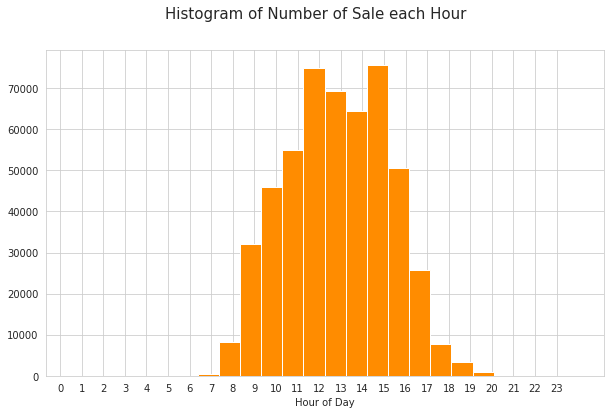

In [ ]:
plt.figure(figsize=[10,6])
plt.hist(df2['transaction_timestamp'].dt.hour, bins=24, range=(0.5,24), color='#FF8C00')
plt.xticks([i for i in range(0,24)])
plt.xlabel("Hour of Day")
plt.suptitle("Histogram of Number of Sale each Hour", fontsize=15);

In [ ]:
print("The Unique countries present in the Sales Transcript are \n", (df2['transaction_country'].nunique()))

The Unique countries present in the Sales Transcript are 
 38


In [ ]:
df_valid.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt,month,hour_of_day,time_of_day,day_of_week,day_of_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,8,08:26:00,Wednesday,335
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,08:26:00,Wednesday,335
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,8,08:26:00,Wednesday,335
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,08:26:00,Wednesday,335
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,8,08:26:00,Wednesday,335


In [ ]:
dfnew=dfpos.drop(columns=['transaction_id','product_id','product_description', 'transaction_timestamp','customer_id'])

In [ ]:
a=pd.Series(' '.join(df2['product_description']).split()).value_counts()[:30]

In [ ]:
a=pd.DataFrame(a, columns=['frequency']).reset_index().rename(columns={'index':'word'})

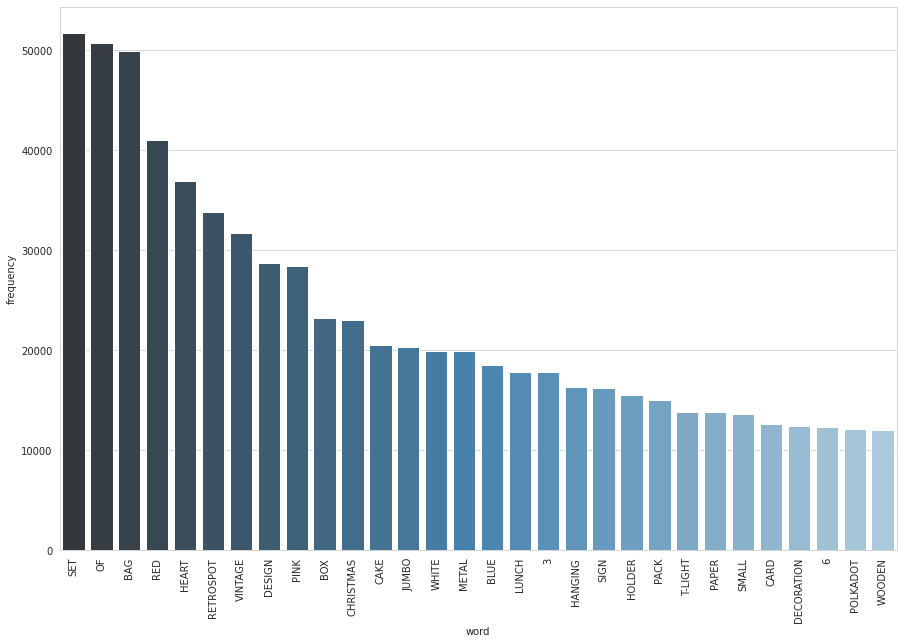

In [ ]:
plt.figure(figsize=[15,10])
sns.barplot('word', 'frequency', data=a, palette="Blues_d")
plt.xticks(rotation=90);

In [ ]:
df2['day_of_week']=df2['transaction_timestamp'].dt.day_name()

In [ ]:
df_sun=df2[df2['day_of_week']=='Sunday']

In [ ]:
df_sun[df_sun['transaction_timestamp'].dt.hour<10]['transaction_timestamp'].dt.day.unique()

array([12, 14, 21, 23,  6])

In [ ]:
 df_sun[df_sun['transaction_timestamp'].dt.hour==16]

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country,sale_amt,day_of_week
9876,537222,21385,IVORY HANGING DECORATION HEART,1,2010-12-05 16:00:00,0.85,14404.0,United Kingdom,0.85,Sunday
9877,537222,21967,PACK OF 12 SKULL TISSUES,1,2010-12-05 16:00:00,0.29,14404.0,United Kingdom,0.29,Sunday
9878,537222,20728,LUNCH BAG CARS BLUE,10,2010-12-05 16:00:00,1.65,14404.0,United Kingdom,16.50,Sunday
9879,537222,21640,ASSORTED TUTTI FRUTTI FOB NOTEBOOK,1,2010-12-05 16:00:00,0.85,14404.0,United Kingdom,0.85,Sunday
9880,537222,20966,SANDWICH BATH SPONGE,1,2010-12-05 16:00:00,1.25,14404.0,United Kingdom,1.25,Sunday
...,...,...,...,...,...,...,...,...,...,...
505282,579002,23356,LOVE HOT WATER BOTTLE,2,2011-11-27 16:27:00,5.95,14093.0,United Kingdom,11.90,Sunday
505283,579002,23355,HOT WATER BOTTLE KEEP CALM,2,2011-11-27 16:27:00,4.95,14093.0,United Kingdom,9.90,Sunday
505284,579002,23076,ICE CREAM SUNDAE LIP GLOSS,24,2011-11-27 16:27:00,1.25,14093.0,United Kingdom,30.00,Sunday
505285,579002,23310,BUBBLEGUM RING ASSORTED,36,2011-11-27 16:27:00,0.42,14093.0,United Kingdom,15.12,Sunday


In [ ]:
df2[df2['day_of_week']=='Sunday']['transaction_timestamp'].dt.time.min().strftime('%H:%M:%S')

'09:18:00'

In [ ]:
df2[df2['day_of_week']=='Sunday']['transaction_timestamp'].dt.time.max().strftime('%H:%M:%S')

'16:41:00'

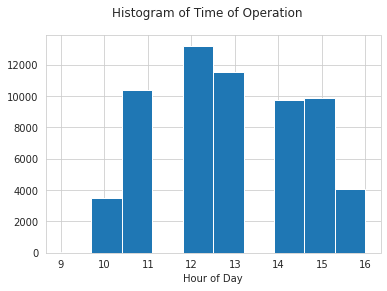

In [ ]:

plt.hist(df2[df2['day_of_week']=='Sunday']['transaction_timestamp'].dt.hour)
plt.suptitle("Histogram of Time of Operation")
plt.xlabel("Hour of Day");

In [ ]:
df2[df2['day_of_week']=='Sunday']['transaction_timestamp'].dt.hour.nunique()

8

In [ ]:
sns.barplot(df2['tra'])